In [12]:
import os
import pandas as pd
from google.cloud import aiplatform
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import deployment as d

In [13]:
kf_endpoint = aiplatform.Endpoint(endpoint_name = 'projects/319407066227/locations/us-east1/endpoints/4942339951225208832')

In [14]:
#get 20 rows of data from each month of 2017
test_data = d.get_random_data(20, 'validation_data/kf_test_117.csv',
 'validation_data/kf_test_217.csv',
 'validation_data/kf_test_317.csv',
 'validation_data/kf_test_417.csv',
 'validation_data/kf_test_517.csv',
 'validation_data/kf_test_617.csv',
 'validation_data/kf_test_717.csv',
 'validation_data/kf_test_817.csv')

In [15]:
test_data

,productListName,localProductPrice,type,productPrice,pageviews,is_addtocart,path_depth,page.pagePath,appInfo.screenName,eventInfo.eventCategory,eCommerceAction.step
0,Category,0,EVENT,24990000,12,0,3,/google+redesign/shop+by+brand/youtube,shop.googlemerchandisestore.com/google+redesig...,Enhanced Ecommerce,1
1,(not set),7190000,EVENT,7190000,29,1,3,/google+redesign/drinkware/mugs+and+cups,shop.googlemerchandisestore.com/google+redesig...,Enhanced Ecommerce,1
2,(not set),124950000,PAGE,124950000,114,0,1,/payment.html,shop.googlemerchandisestore.com/payment.html,NaN,2
3,(not set),0,EVENT,99990000,27,0,1,/basket.html,shop.googlemerchandisestore.com/basket.html,Enhanced Ecommerce,1
4,Search Results,0,EVENT,2990000,14,0,1,/asearch.html,shop.googlemerchandisestore.com/asearch.html,Enhanced Ecommerce,1
...,...,...,...,...,...,...,...,...,...,...,...
155,Category,0,PAGE,18990000,19,0,5,/google+redesign/apparel/womens/womens+t+shirt...,shop.googlemerchandisestore.com/google+redesig...,NaN,1
156,(not set),199920000,PAGE,199920000,17,0,1,/payment.html,shop.googlemerchandisestore.com/payment.html,NaN,2
157,Category,0,EVENT,99990000,16,0,3,/google+redesign/shop+by+brand/google,shop.googlemerchandisestore.com/google+redesig...,Enhanced Ecommerce,1
158,(not set),76740000,PAGE,76740000,27,0,1,/yourinfo.html,shop.googlemerchandisestore.com/yourinfo.html,NaN,1


In [16]:
y_true, y_pred = d.evaluate_results(test_data, 'is_addtocart', kf_endpoint)
stats = d.get_stats(y_true, y_pred)
print(f"accuracy: {stats[0]} \nprecision: {stats[1]} \nrecall: {stats[2]} \nf1: {stats[3]}")

accuracy: 1.0 
precision: 1.0 
recall: 1.0 
f1: 1.0


In [17]:
#see results
pd.concat([y_true, y_pred], keys = ["true", "predicted"], axis = 1)

,true,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
155,0,0
156,0,0
157,0,0
158,0,0


Text(0.5, 1.0, 'Prediction Results')

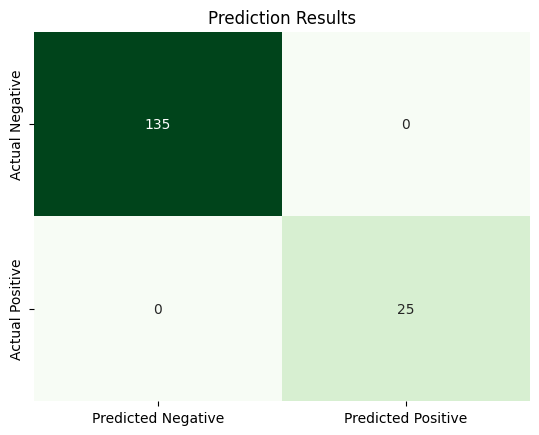

In [18]:
#visualize performance
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title("Prediction Results")